In [1]:
"""Handwriting Digit Classification:
MNIST Dataset, ANN, 28*28=784 pixel, 70K images
784 nodes: Input, 128 nodes: Hidden layer 1, 10 nodes: Output
"""

'Handwriting Digit Classification:\nMNIST Dataset, ANN, 28*28=784 pixel, 70K images\n784 nodes: Input, 128 nodes: Hidden layer 1, 10 nodes: Output\n'

In [2]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


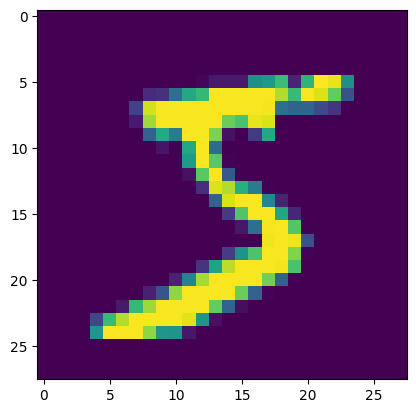

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0]) #cmap='gray'
#Actually, the image is encoded in 8-bit format, greyscale image instead of 3*8-bit format for RGB, but colored image is shown by plt's colormap, which has color value for greyscale's image 0 to 255 values

In [6]:
"""Now, scaling values from 0 to 255 into 0 to 1"""
X_train=X_train/255
X_test=X_test/255
model = Sequential()
#We have to flatten the train and test data as, in our architecture there are 784 inputs.
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

C:\Users\q\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
#We are using sparse_categorical_crossentropy one-hot encoding is not needed, means boolean type instead of categorical data, and in categorical_data_crossentropy, it needs one-hot encoding

In [ ]:
#Training Model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8698 - loss: 0.4731 - val_accuracy: 0.9507 - val_loss: 0.1631
Epoch 2/10
1205/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9618 - loss: 0.1334

In [ ]:
y_prob = model.predict(X_test)
#The predicted result is in format of 10*n array, where each 10-membered array contains probability, of digit to be the corresponding digit.
#So, digit with max_probability is the predicted digit.
y_pred = y_prob.argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9768

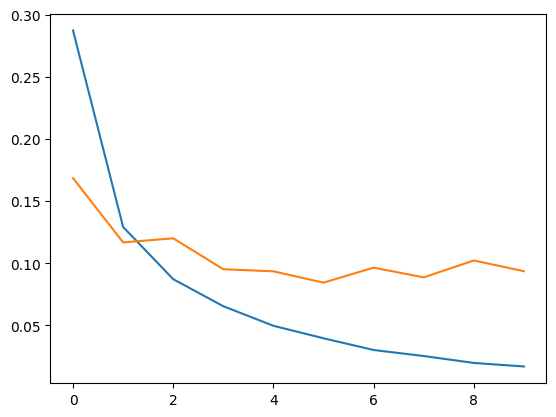

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

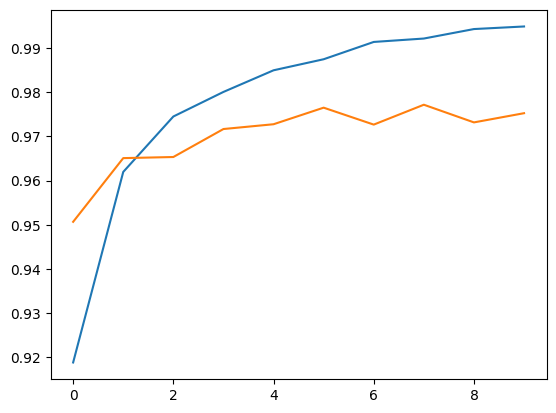

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])